<a href="https://colab.research.google.com/github/sofiaarbasetti/MetodosNumericosIBM-2/blob/main/MN_IntegracionNumerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo: Integracion Numerica

In [6]:
# LIBRERÍAS

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sy
import pandas as pd
from sympy import sin,exp
# Matplotlib 
%matplotlib inline
# Seabron
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

x = sy.symbols('x')

## Clase


Necesito calcular el area bajo la curva de la siguiente función, ¿Cómo lo hago?

In [15]:
#Defino función
def f(x): return (np.sin(x)*np.exp(-x/4) +1)

In [16]:
x = np.linspace(0,4,50)
y = f(x)

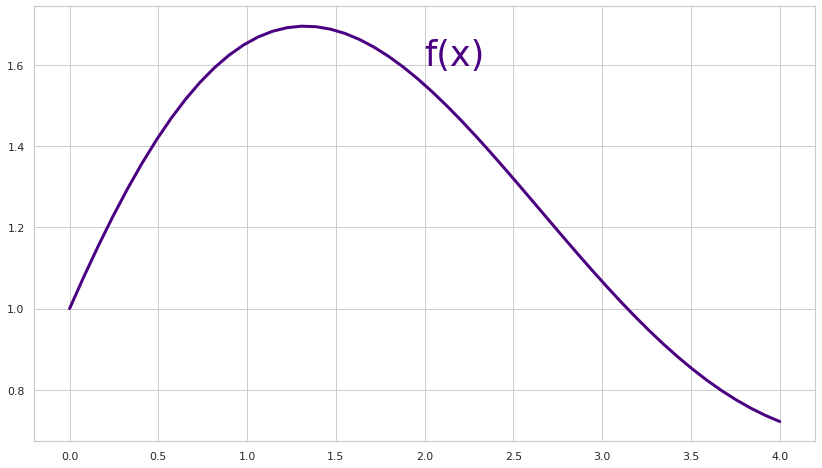

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)
ax.text(2, 1.6, r'f(x)', fontsize=35,color='#4b0082')
plt.show()

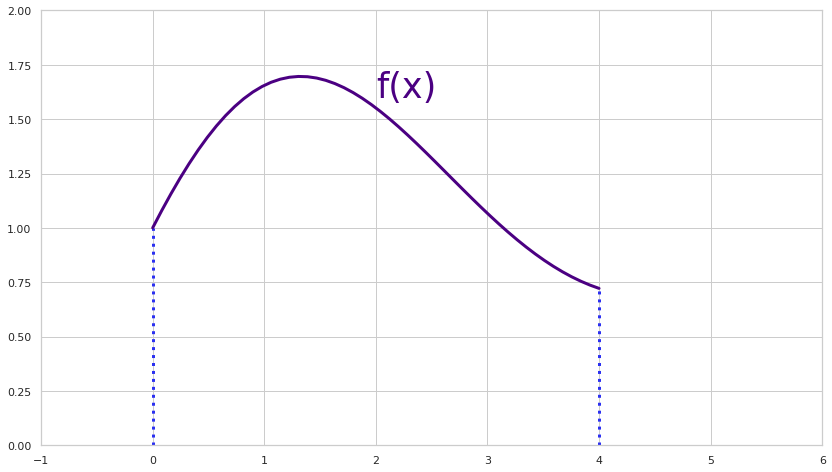

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')


ax.text(2, 1.6, r'f(x)', fontsize=35,color='#4b0082')

ax.axis([-1, 6, 0 , 2])
ax.grid(True)   #Ver las grillas (para sacar cambio por false)

plt.show()

### plt.fill_between

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(2, 1.6, r'f(x)', fontsize=35,color='#4b0082')
ax.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

## Función f(x)

In [9]:
def func(x): return (sp.sin(x)*sp.exp(-x/4) +1)   

## Calcular la integral Real

In [7]:
x_ = sy.Symbol('x_')
f_ = sin(x_)*exp(-x_/4) +1

$\int_{0}^{4} sin(x)*exp(-x/4) +1 \,dx $

In [8]:
area_real = sy.integrate(f_, (x_, 0, 4))
print(area_real)
print("...........")      
area_real.evalf()     #con .evalf() me devuelve el resultado

-4*exp(-1)*sin(4)/17 - 16*exp(-1)*cos(4)/17 + 84/17
...........


5.23300241857067

In [10]:
# Metodo para calcular area Real de f(x):

def area_real(start, finish, func):
    '''
        Area real de la funcion.
        start: punto de inicio de integral
        finish: punto de fin de integral
        func: funcion - sin '(parametro)'
    '''
    area_real = sp.integrate(func(x), (x, start, finish))
    return area_real.evalf()

In [11]:
area_real(0,4,func)

5.23300241857067

## Calcular por Método Punto Medio

In [12]:
## Vamos a utilizar bastantes Rectangle
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

### Plot

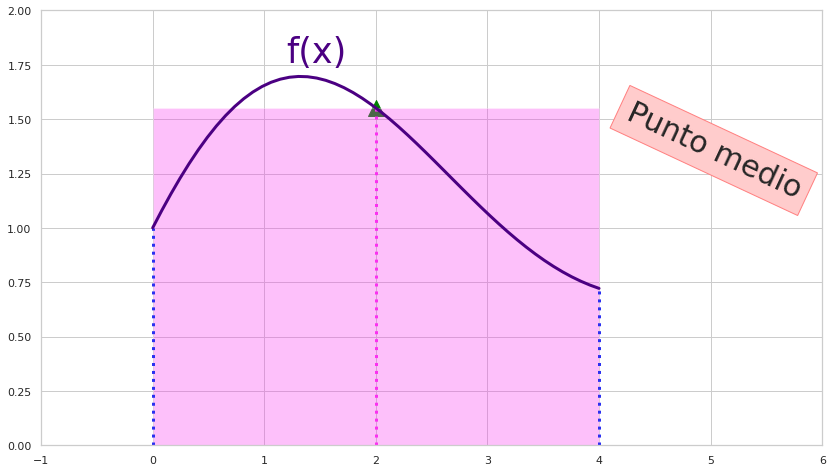

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')


ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Punto medio ---------------

punto_medio = (seccion_interes[1]-seccion_interes[0])/2
ax.vlines(x=punto_medio, ymin=0, ymax=f(punto_medio) ,linewidth=3,linestyle=':',color='#fb30f1')

ax.add_patch(
     patches.Rectangle(
        (seccion_interes[0], seccion_interes[0]),
        seccion_interes[1],
        f(punto_medio),
        #edgecolor = '#fb30f1',
        facecolor = '#fb30f1',
        alpha=0.3,
        fill=True
     ))

ax.scatter(punto_medio, f(punto_medio), s=254, marker='^', c='green')

ax.text(5.85, 1.6, "Punto medio", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Punto medio ---------------       

ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

### Metodo

In [ ]:
altura           = f(punto_medio)
base             = seccion_interes[1]- seccion_interes[0]
area_punto_medio = altura*base
area_punto_medio

6.206067072670323

In [20]:
# Definición del Método:
def punto_medio(pInicio,pFinal,func):
    '''
        Metodo Punto Medio para funcion.
        func: funcion - sin '(parametro)'
    '''
    return f(((pInicio+pFinal)/2))*(pFinal-pInicio)

In [21]:
punto_medio(0,4,f)

6.206067072670323

## Calcular por Método del Trapecio

### Plot

In [22]:
from scipy.interpolate import lagrange

In [23]:
# lagrange 1er orden
trapecio_x= seccion_interes
trapecio_y=[f(seccion_interes[0]),f(seccion_interes[1])]
p_trapecio = lagrange(trapecio_x,trapecio_y)

def recta_trapecio(x): 
  return (p_trapecio[1]*x+p_trapecio[0])


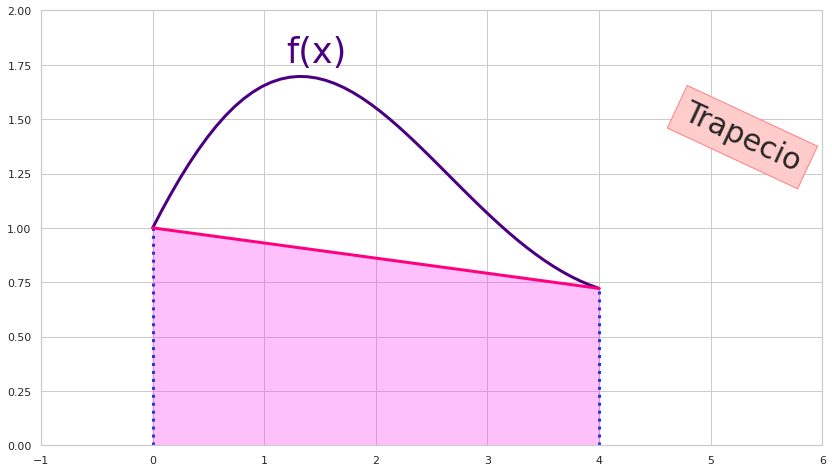

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,recta_trapecio(x),color='#ff0082', linewidth=3)


ax.fill_between(x,recta_trapecio(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)
    #Pinta debajo de la curva/recta que se le pase por parámetro


ax.text(5.85, 1.6, "Trapecio", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------       

ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [25]:
area_trapecio = sy.integrate(recta_trapecio(x_), (x_, 0, 4))
print(area_trapecio)
print("...........")      
area_trapecio.evalf()

3.44317584189793
...........


3.44317584189793

### Metodo

In [26]:
def trapecio(a,b,func):
    '''
        Metodo de Trapecio para funcion.
        a: punto de inicio de integral
        b: punto de fin de integral
        func: funcion - sin '(parametro)'
    '''
    return (0.5 * (f(b)+f(a)) * (b-a))

In [27]:
trapecio(0,4,f)

3.443175841897933

## Simpson 1/3

### Plot

In [34]:
# lagrange 1er orden
a=0
b=4
seccion_interes = [a,b]
punto_medio = (seccion_interes[1]-seccion_interes[0])/2
simpson_x= [seccion_interes[0],punto_medio,seccion_interes[1]]
simpson_y=[func(seccion_interes[0]),func(punto_medio),func(seccion_interes[1])]
p_2 = lagrange(simpson_x,simpson_y)

def curva_simpson(x): 
  return (p_2[2]*x**2+p_2[1]*x+p_2[0])

In [35]:
curva_simpson(x)

array([1.00000000000000, 1.0441029652179 - 0.00720130517911611*sin(4),
       1.08636830688505 - 0.0137897333217117*sin(4),
       1.12679602500146 - 0.0197652844277868*sin(4),
       1.16538611956712 - 0.0251279584973413*sin(4),
       1.20213859058204 - 0.0298777555303754*sin(4),
       1.23705343804621 - 0.0340146755268889*sin(4),
       1.27013066195963 - 0.0375387184868819*sin(4),
       1.30137026232231 - 0.0404498844103543*sin(4),
       1.33077223913424 - 0.0427481732973063*sin(4),
       1.35833659239543 - 0.0444335851477377*sin(4),
       1.38406332210587 - 0.0455061199616486*sin(4),
       1.40795242826557 - 0.045965777739039*sin(4),
       1.43000391087452 - 0.0458125584799089*sin(4),
       1.45021776993272 - 0.0450464621842582*sin(4),
       1.46859400544018 - 0.0436674888520871*sin(4),
       1.48513261739689 - 0.0416756384833954*sin(4),
       1.49983360580286 - 0.0390709110781832*sin(4),
       1.51269697065808 - 0.0358533066364504*sin(4),
       1.52372271196255 - 0.0

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,curva_simpson(x),color='#ff0082', linewidth=3)


ax.fill_between(x,curva_simpson(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Simpson", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------       

ax.scatter(simpson_x, simpson_y, s=84, marker='o', c='black')


ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [37]:
area_simpson = sy.integrate(curva_simpson(x_), (x_, 0, 4))
print(area_simpson)
print("...........")      
area_simpson.evalf()

0.245252960780961*sin(4) + 5.47071138178022
...........


5.28510332907953

### Metodo

In [38]:
def simpson13(a,b,func):
    '''
        Metodo de simpson 1/3 para funcion.
        a: punto de inicio de integral
        b: punto de fin de integral
        func: funcion - sin '(parametro)'
    '''
    
    h = (b-a)/2
    
    return ((h/3)*(f(a) + 4*f((a+b)/2) + f(b)))

In [39]:
simpson13(0,4,f)

5.285103329079526

## Simpson 3/8

### Plot

In [40]:
simpson38_x = np.linspace(seccion_interes[0],seccion_interes[1],4)    #Ese "4" es la cantidad de segmentos en que voy a dividir
simpson38_y = f(simpson38_x)
p_38 = lagrange(simpson38_x,simpson38_y)

In [41]:
def curva_simpson38(x): 
  return (p_38[3]*x**3+p_38[2]*x**2+p_38[1]*x+p_38[0])

In [42]:
p_38[3]*x_**3+p_38[2]*x_**2+p_38[1]*x_+p_38[0]

0.0778039419368018*x_**3 - 0.63692472204299*x_**2 + 1.23323279742037*x_ + 1.0

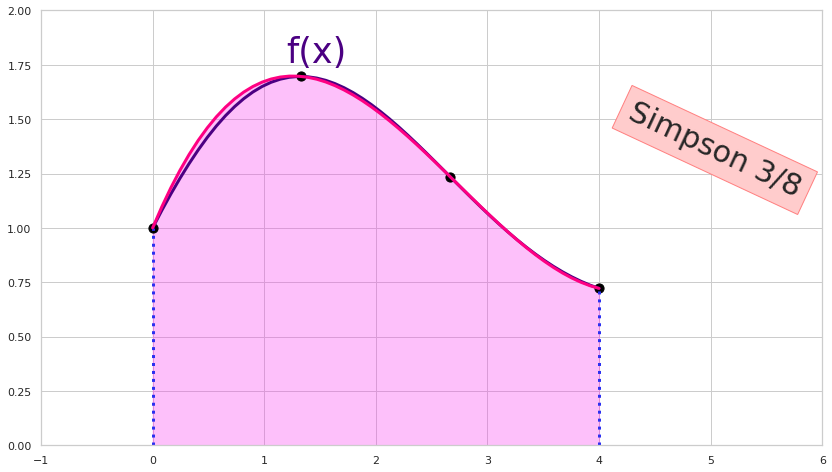

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

seccion_interes = [0,4]
ax.vlines(x=seccion_interes[0], ymin=0, ymax=f(seccion_interes[0]) ,linewidth=3,linestyle=':',color='#2b30f1')
ax.vlines(x=seccion_interes[1], ymin=0, ymax=f(seccion_interes[1]) ,linewidth=3,linestyle=':',color='#2b30f1')



ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Trapecio ---------------


ax.plot(x,curva_simpson38(x),color='#ff0082', linewidth=3)


ax.fill_between(x,curva_simpson38(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='#fb30f1', alpha=0.3)



ax.text(5.85, 1.6, "Simpson 3/8", size=30, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## Fin Trapecio ---------------       

ax.scatter(simpson38_x, simpson38_y, s=84, marker='o', c='black')


ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [ ]:
area_simpson38 = sy.integrate(curva_simpson38(x_), (x_, 0, 4))
print(area_simpson38)
print("...........")      
area_simpson38.evalf()

5.25758725973451
...........


5.25758725973451

### Metodo

In [ ]:
def simpson38(a,b,func):
    '''
        Metodo de Simpson 3/8 para funcion.
        a: punto de inicio de integral
        b: punto de fin de integral
        func: funcion - sin '(parametro)'
    '''
    
    h = (b-a)/3
    x1 = h
    x2 = h*2
    
    return ((3/8) * h * (f(a) + 3*f(x1) + 3*f(x2) + f(b)))

In [ ]:
simpson38(0,4,f)

## Punto Medio con N intervalos

In [ ]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

In [ ]:

seccion_interes = [0,4] # donde esta definida la integral
N = 5 # => voy a obtener N=5 => 4 intervalos
v_intevalos_x = np.linspace(seccion_interes[0],seccion_interes[1],N) # vector/array
f(v_intevalos_x)


array([1.        , 1.65533826, 1.55151677, 1.06666037, 0.72158792])

In [ ]:
v_intevalos_x

array([0., 1., 2., 3., 4.])

In [ ]:
range(5,1)

range(5, 1)

In [ ]:
def calcular_punto_medio(v):
  resultado = []
  for i in range(1,len(v)):
    #print((v[i]-v[i-1])/2)
    resultado.append(v[i-1]+(v[i]-v[i-1])/2)
    

  return np.asarray(resultado)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
ax.plot(x,y,color='#4b0082', linewidth=3)

ax.text(5.75, 1.92, "Punto medio con N intervalos", size=20, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
## ==================================================


# Anteriormente lo vimos en derivadas
ax.vlines(x = v_intevalos_x, ymin = np.zeros(N), ymax = f(v_intevalos_x),
          linewidth=3,linestyle=':',color='#2b30f1')





ax.text(1.2, 1.76, r'f(x)', fontsize=35,color='#4b0082')
#plt.fill_between(x,f(x), where=[(x>=seccion_interes[0]) and (x<=seccion_interes[1]) for x in x], color='green', alpha=0.3)

## Punto medio ---------------
v_punto_medio = calcular_punto_medio(v_intevalos_x)
ax.vlines(x = v_punto_medio, ymin = np.zeros(len(v_punto_medio)), ymax = f(v_punto_medio),
          linewidth=3,linestyle='--',color='#fb30f1')

## Rectangulos
# ax.add_patch(
#      patches.Rectangle(
#         (seccion_interes[0], seccion_interes[0]),
#         seccion_interes[1],
#         f(punto_medio),
#         #edgecolor = '#fb30f1',
#         facecolor = '#fb30f1',
#         alpha=0.3,
#         fill=True
#      ) )


for i in range(0,len(v_intevalos_x)-1):
  inicio_ = v_intevalos_x[i]
  fin_    = v_intevalos_x[i+1] -inicio_
  print( inicio_)
  print( fin_)
  print(f(v_punto_medio[i]))
  print("====")

  ax.add_patch(
     patches.Rectangle(
        (inicio_, 0),
        fin_,f(v_punto_medio[i]),
        #edgecolor = '#fb30f1',
        facecolor = '#fb30f1',
        alpha=0.3,
        fill=True
     ) )


      

ax.axis([-1, 6, 0 , 2])
ax.grid(True)

plt.show()

In [ ]:
f(v_punto_medio[i])

0.853771795235959

In [ ]:
for i in range(0,len(v_intevalos_x)-1):
  print(v_intevalos_x[i])
  print(v_intevalos_x[i+1])
  print("--------")

0.0
1.0
--------
1.0
2.0
--------
2.0
3.0
--------
3.0
4.0
--------
